# Assignment-1

Loading the data and importing the libraries

In [3]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dataset 
path = r"./Telco-Customer-Churn_15081388-b1c7-4a07-a581-6b6a494e6346.xlsx"
df = pd.read_excel(path)

# overview
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# data types of each column
print("\nData types:")
print(df.dtypes)

# missing values count per column
print("\nMissing values per column:")
print(df.isna().sum())


Shape of dataset: (7043, 21)

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Stre

tells about the type of data in each column and missing values in the column

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
df.head()


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


mentioning the numerical and categorical column

In [6]:
# Imputing missing values 
for c in numeric_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

for c in categorical_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mode(dropna=True).iloc[0])

df.isna().sum().sum()


np.int64(0)

no missing values so not necessary just to cross check

In [8]:
# Numeric summary
desc = df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).T
desc['variance'] = df[numeric_cols].var().values
desc['skewness'] = df[numeric_cols].skew().values
desc[['count','mean','std','variance','min','25%','50%','75%','max','skewness']].round(3)

# Numeric modes
num_modes = df[numeric_cols].mode().iloc[0]
num_modes

# Categorical frequencies
cat_freqs = {c: df[c].value_counts(dropna=False) for c in categorical_cols}
# Show a couple of examples
for c in categorical_cols[:5]:
    print(f"\n== {c} ==")
    print(cat_freqs[c].head(10))



== customerID ==
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
4501-VCPFK    1
6075-SLNIL    1
9347-AERRL    1
0093-XWZFY    1
2274-XUATA    1
1980-KXVPM    1
7703-ZEKEF    1
Name: count, dtype: int64

== gender ==
gender
Male      3555
Female    3488
Name: count, dtype: int64

== Partner ==
Partner
No     3641
Yes    3402
Name: count, dtype: int64

== Dependents ==
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

== PhoneService ==
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Tell us that their are no reperated customer and the distribution of male and female in the dataset also wether they have partner or not and wether the customer have dependency or not almost 70 percent don't have dependency. The code also tells us wether the customer has phone service or not

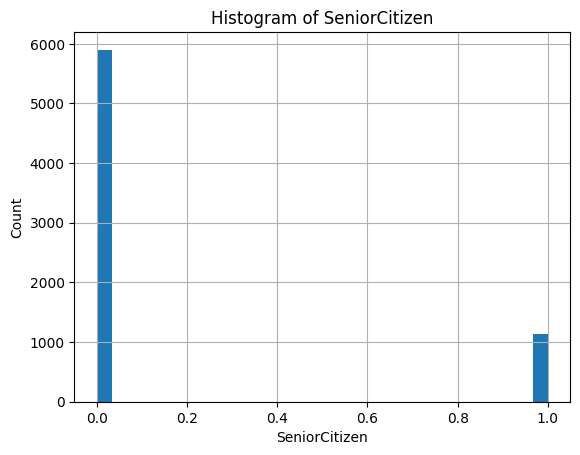

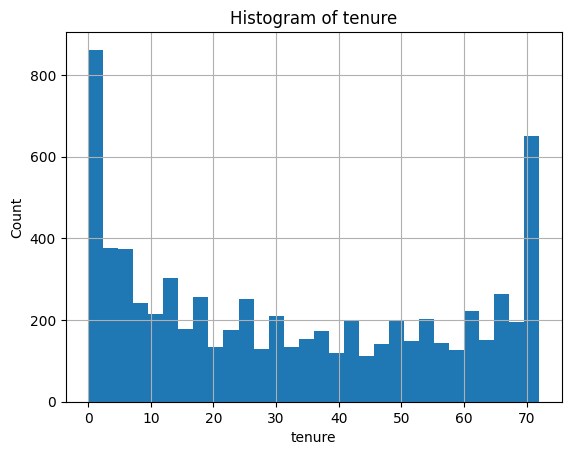

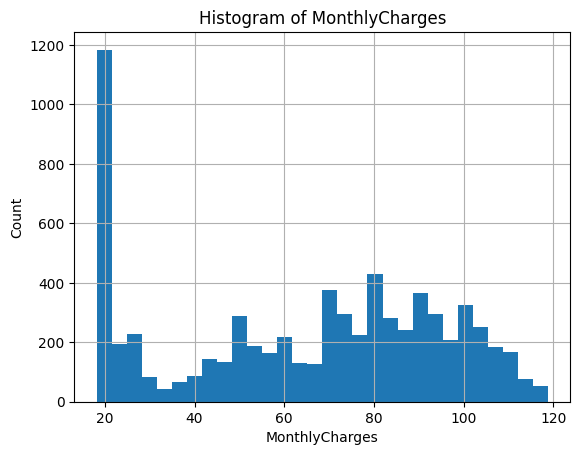

In [9]:
# Histograms
for c in numeric_cols:
    plt.figure()
    df[c].hist(bins=30)
    plt.title(f"Histogram of {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


<Figure size 600x400 with 0 Axes>

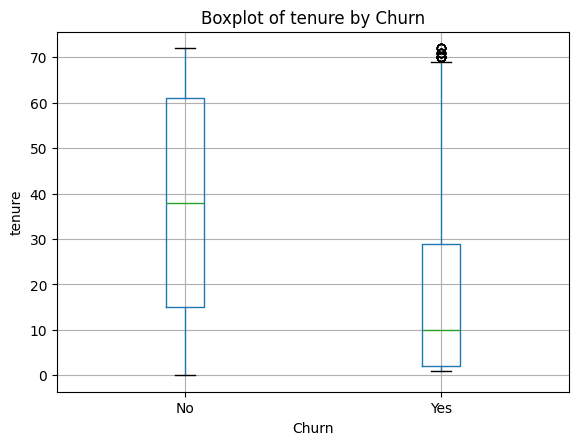

<Figure size 600x400 with 0 Axes>

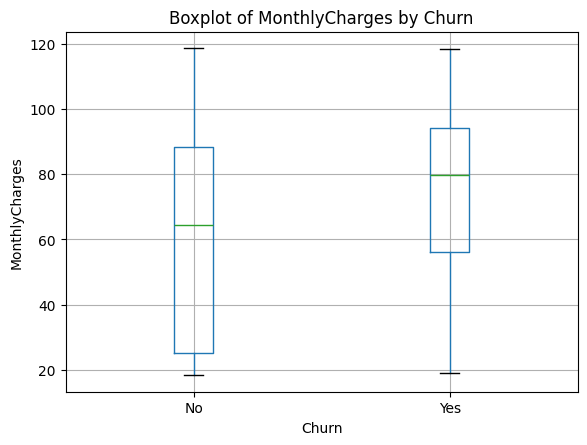

<Figure size 600x400 with 0 Axes>

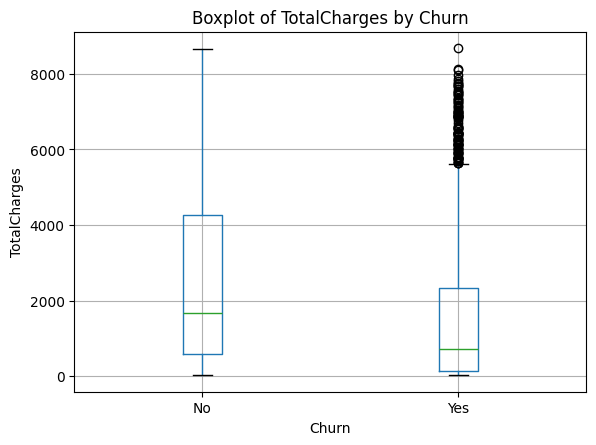

In [13]:
# Boxplots of numeric variables to compare churn vs non-churn customers
import matplotlib.pyplot as plt

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col, by='Churn')
    plt.title(f"Boxplot of {col} by Churn")
    plt.suptitle("")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()


The boxplots reveal that churn is strongly associated with lower customer tenure, higher monthly charges, and lower total charges. Most churned customers leave within their first year, indicating that early-stage retention is critical. They also tend to face higher monthly bills, suggesting that expensive plans may drive dissatisfaction. As a result, churned customers accumulate much lower total charges compared to loyal customers who stay longer and spend more over time. Overall, the plots highlight that short tenure and high monthly costs are key churn drivers, while long-tenure customers represent the most stable segment.

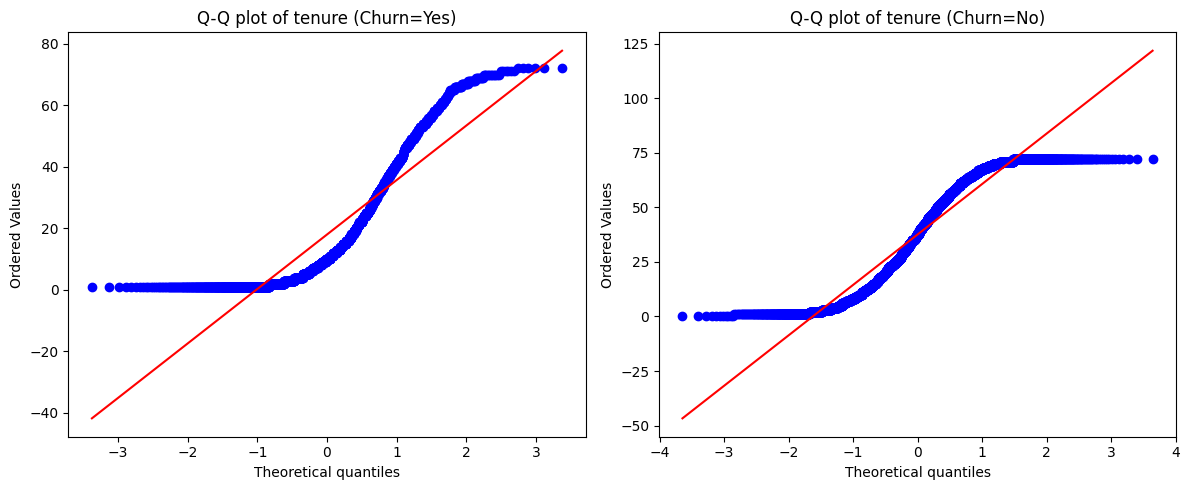

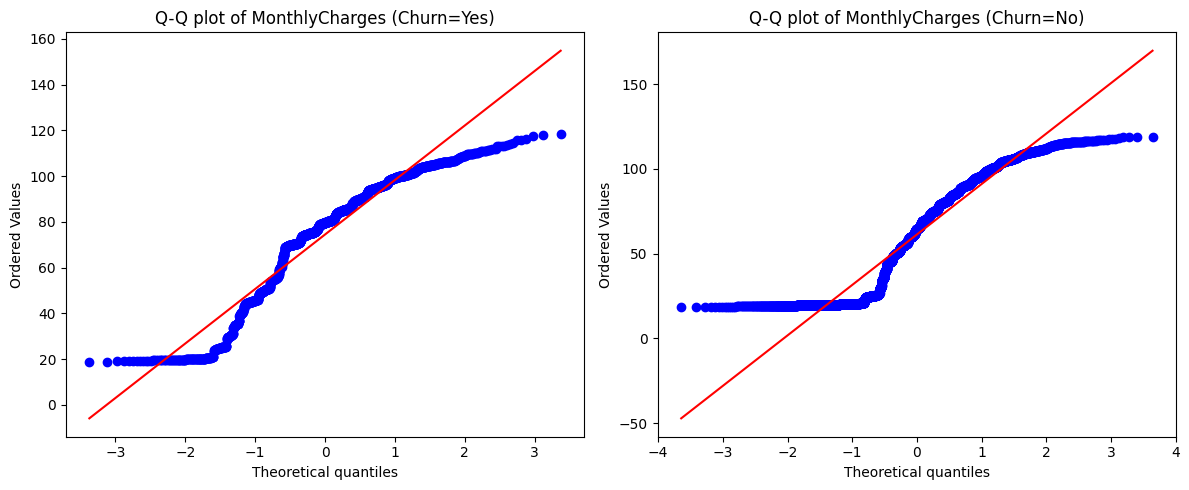

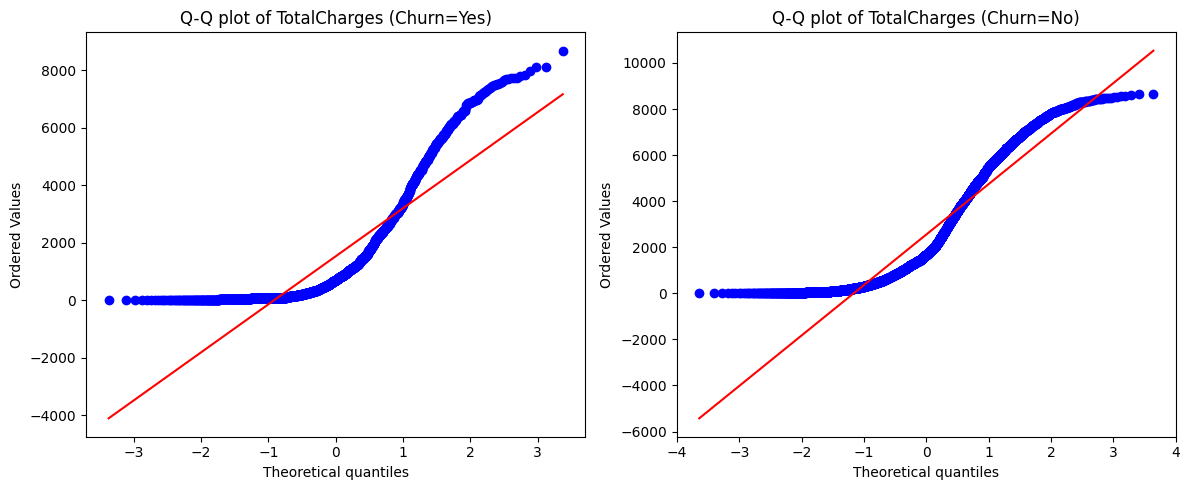

In [16]:
# Q-Q plots for churn vs non-churn
import scipy.stats as stats
import matplotlib.pyplot as plt

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(12,5))

    # Split churn vs non-churn
    churned = df[df['Churn'] == 'Yes'][col]
    not_churned = df[df['Churn'] == 'No'][col]

    # Q-Q plot for churned
    plt.subplot(1,2,1)
    stats.probplot(churned, dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {col} (Churn=Yes)")

    # Q-Q plot for not churned
    plt.subplot(1,2,2)
    stats.probplot(not_churned, dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {col} (Churn=No)")

    plt.tight_layout()
    plt.show()


The Q-Q plots show that for tenure, churned customers have a highly skewed distribution with most values at very low tenures, while non-churned customers display longer and more normally spread tenures, reinforcing that customers with short tenure are more prone to churn. For MonthlyCharges, churned customers tend to deviate more from normality, especially at higher charges, suggesting that higher monthly costs may drive churn, whereas non-churned customers are more evenly distributed across lower to mid-level charges. For TotalCharges, churned customers cluster at the lower end, reflecting both shorter tenure and lower cumulative payments, while non-churned customers span a wide range with higher totals, consistent with long-term retention. Overall, churn is strongly linked to shorter tenure, higher monthly charges, and lower total charges.

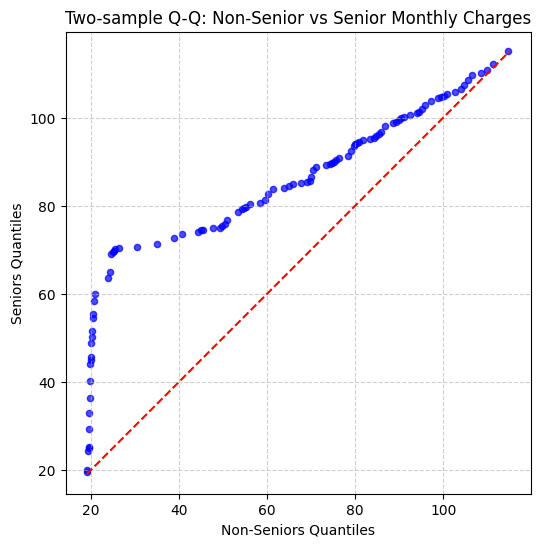

In [19]:
# Two-sample Q-Q plot for Senior vs Non-Senior on MonthlyCharges
if 'SeniorCitizen' in df.columns and 'MonthlyCharges' in df.columns:
    seniors = df.loc[df['SeniorCitizen'] == 1, 'MonthlyCharges'].dropna().values
    nons    = df.loc[df['SeniorCitizen'] == 0, 'MonthlyCharges'].dropna().values

    # Matching lengths by using quantiles
    q = np.linspace(0.01, 0.99, 99)
    s_q = np.quantile(seniors, q)
    n_q = np.quantile(nons, q)

    plt.figure(figsize=(6,6))
    plt.scatter(n_q, s_q, s=20, color="blue", alpha=0.7)
    lims = [min(n_q.min(), s_q.min()), max(n_q.max(), s_q.max())]
    plt.plot(lims, lims, color="red", linestyle="--")  # 45-degree line
    plt.title("Two-sample Q-Q: Non-Senior vs Senior Monthly Charges")
    plt.xlabel("Non-Seniors Quantiles")
    plt.ylabel("Seniors Quantiles")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.axis("equal")
    plt.show()
else:
    print("Columns 'SeniorCitizen' and/or 'MonthlyCharges' not found for Q-Q plot.")


The plot shows that for lower quantiles (left side), seniors tend to have higher monthly charges compared to non-seniors (points above the red 45° line). In the mid-quantiles, the distributions are somewhat similar, but as we move toward higher quantiles, seniors’ charges still remain slightly above those of non-seniors. This suggests that seniors, on average, are more likely to pay higher monthly charges than non-seniors, which could contribute to an increased likelihood of churn among this group due to higher cost sensitivity.

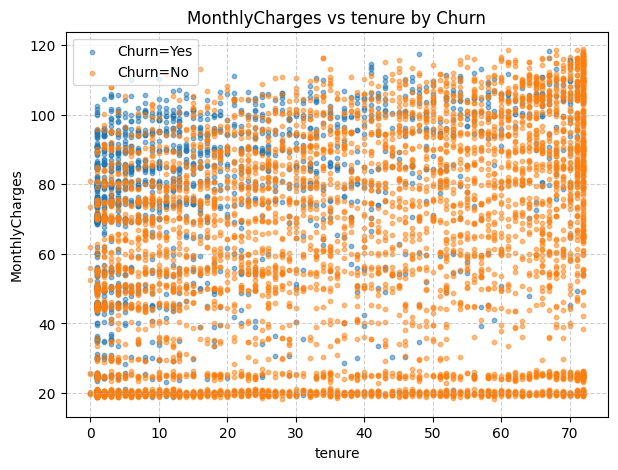

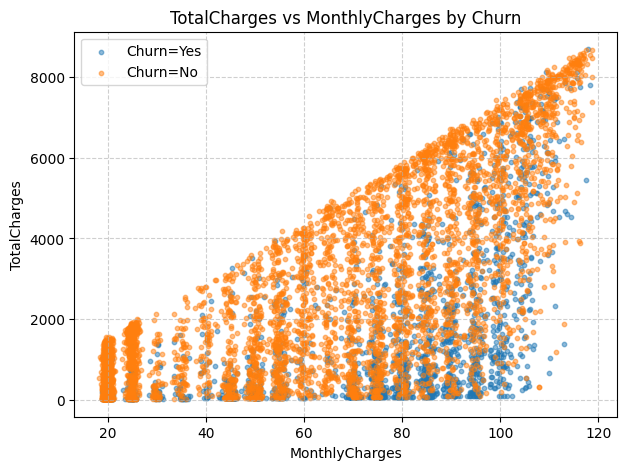

In [20]:
# Scatter plots
import matplotlib.pyplot as plt

pairs = []
if {'tenure','MonthlyCharges'}.issubset(df.columns):
    pairs.append(('tenure', 'MonthlyCharges'))
if {'MonthlyCharges','TotalCharges'}.issubset(df.columns):
    pairs.append(('MonthlyCharges', 'TotalCharges'))

for x, y in pairs:
    plt.figure(figsize=(7,5))
    for ch in ['Yes', 'No']:
        sub = df[df['Churn'] == ch]
        plt.scatter(sub[x], sub[y], s=10, alpha=0.5, label=f"Churn={ch}")
    plt.title(f"{y} vs {x} by Churn")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


this plot againt the same thing that the customers with high monthly charges and higher lower tenure are nore likely to churn similarly with the high monthly charges and higher total charges are likely to churn

In [24]:
# Make sure target is numeric 
if df['Churn'].dtype not in [np.int64, np.int32, np.float64, np.float32]:
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype('int64')

# --- Recompute column lists cleanly ---
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Exclude IDs / target / overly granular columns
id_like = {'customerID', 'CustomerID', 'customer_id'}
categorical_cols = [c for c in categorical_cols if c not in id_like and c != 'Churn']

# drop very high-cardinality categoricals (keeps clean summaries)
max_levels = 20
categorical_cols = [c for c in categorical_cols if df[c].nunique() <= max_levels]

# churn rate per category
def churn_rate_table(frame, cat_cols, target='Churn', min_count=50):
    tables = []
    for c in cat_cols:
        t = (frame.groupby(c, dropna=False)[target]
                    .agg(count='count', churn_rate='mean')
                    .reset_index())
        t['churn_rate'] = 100 * t['churn_rate']  # %
        t['feature'] = c
        # filter out very small groups (avoid noisy 0%/100% rates)
        t = t[t['count'] >= min_count]
        tables.append(t)
    return pd.concat(tables, ignore_index=True)

cat_churn = churn_rate_table(df, categorical_cols)
overall_rate = 100 * df['Churn'].mean()
print(f"Overall churn rate: {overall_rate:.1f}%")

#  Top high-risk categories overall
top10 = (cat_churn.sort_values(['churn_rate','count'], ascending=[False, False])
                  .head(10)
                  .reset_index(drop=True))
display(top10)


Overall churn rate: 26.5%


,gender,count,churn_rate,feature,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,NaN,2365,45.285412,PaymentMethod,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electronic check
1,NaN,3875,42.709677,Contract,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,NaN
2,NaN,3096,41.892765,InternetService,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3498,41.766724,OnlineSecurity,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3473,41.635474,TechSupport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
5,NaN,3088,39.928756,OnlineBackup,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,3095,39.127625,DeviceProtection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2785,33.680431,StreamingMovies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
8,NaN,4171,33.565092,PaperlessBilling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
9,NaN,2810,33.523132,StreamingTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN


the above code gives us the total churn rate of the dataset that is 26.5% and give the top 10 features that give the best churn rate (payment method outperformes with 45.28%)